In [20]:
import cv2
import numpy as np 
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import matplotlib.image as image
from PIL import Image, ImageOps
from numpy import asarray
import threading

In [21]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [22]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#Color conversion BGR 2 RGB
    image.flags.writeable = False #Image is unwriteable
    results = model.process(image)#Make prediction
    image.flags.writeable = True#Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#color conversion RGB 2 BGR
    return image, results

In [23]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)#Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)#Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#Draw hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#Draw hand connections

In [24]:
def draw_styled_landmarks(image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness = 1, circle_radius =1),
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness = 1, circle_radius =1)
                             )
    #Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness = 2, circle_radius =2)
                             )
    #Draw hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness = 2, circle_radius =2)
                             )
    #Draw hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness = 2, circle_radius =4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness = 2, circle_radius =2)
                             )

In [25]:
cap = cv2.VideoCapture(0)
#Set mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #Break loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [26]:
results.face_landmarks.landmark

[x: 0.5757087469100952
y: 0.4821646809577942
z: -0.008956169709563255
, x: 0.6070032715797424
y: 0.43162092566490173
z: -0.03923293203115463
, x: 0.5784302949905396
y: 0.4431270658969879
z: -0.01541364099830389
, x: 0.5934537053108215
y: 0.3731748163700104
z: -0.04788314923644066
, x: 0.611966609954834
y: 0.41539278626441956
z: -0.04444438964128494
, x: 0.6084403395652771
y: 0.39186033606529236
z: -0.044881176203489304
, x: 0.5924214124679565
y: 0.32840877771377563
z: -0.03490859642624855
, x: 0.4950646162033081
y: 0.3127084970474243
z: -0.07540734857320786
, x: 0.5927904844284058
y: 0.2800917625427246
z: -0.03754081204533577
, x: 0.5986212491989136
y: 0.2573695480823517
z: -0.04330236464738846
, x: 0.5990873575210571
y: 0.17438793182373047
z: -0.051779236644506454
, x: 0.5730530619621277
y: 0.4903537333011627
z: -0.006228991784155369
, x: 0.5687872767448425
y: 0.4958113729953766
z: -0.002204043325036764
, x: 0.5638916492462158
y: 0.4980199933052063
z: 0.002511168597266078
, x: 0.56406

In [27]:
draw_styled_landmarks(frame, results)

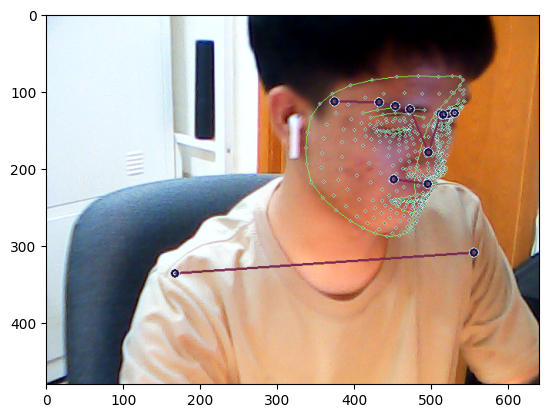

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Vẽ điểm trên ảnh bất kỳ

In [10]:
test_img = Image.open("frame1.jpg")
to_array_test_img = asarray(test_img)
to_array_test_img.shape

(1920, 1080, 3)

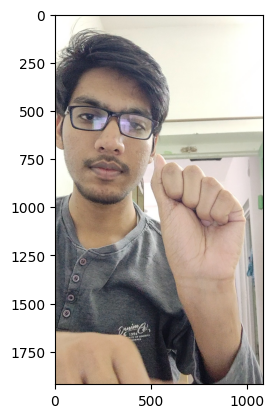

In [11]:
plt.imshow(cv2.rotate(to_array_test_img, cv2.ROTATE_180))

In [12]:
# test_img = test_img.resize((640, 480))

In [13]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    a, b = mediapipe_detection(to_array_test_img, holistic)
    draw_styled_landmarks(a, b)

In [14]:
draw_styled_landmarks(a, b)

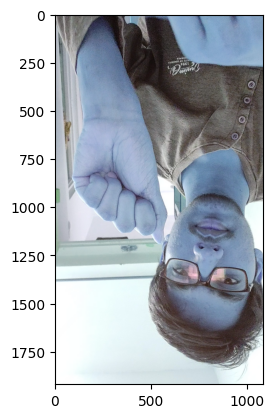

In [15]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))

# End

In [28]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if \
        results.face_landmarks else np.zeros(468*3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if \
        results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if \
        results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if \
        results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [29]:
results_test = extract_keypoints(results)

In [30]:
results_test.shape

(1662,)

# setup folder for collection

In [31]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect# n_inputs = 30, input = 30 frames
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [63]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    try:
        os.makedirs(os.path.join(DATA_PATH, action + '_image'))
    except:
        pass
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect keypoint for training

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            count = 0
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
#                 img_path = os.path.join(DATA_PATH, action + '_image', 'frame%d.jpg' % count)
                count+=1
#                 cv2.imwrite(img_path, image)
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
#                 NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

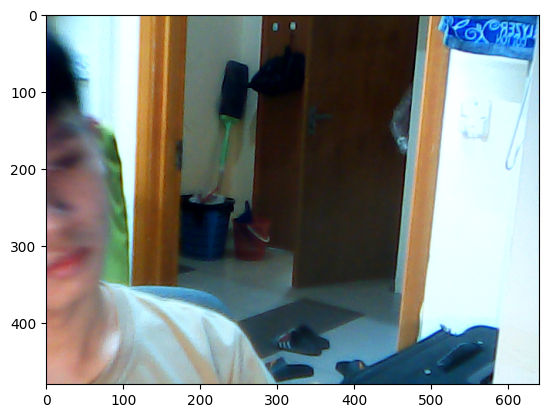

In [58]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))